<a href="https://colab.research.google.com/github/marcmec/SupportVectorMachine/blob/master/SVM_TDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_blobs
%matplotlib inline
le = preprocessing.LabelEncoder();
db= pd.read_csv('/Tcaixas.csv', sep= ';')

In [51]:
model = SVC( kernel= 'linear', coef0=0.2)

In [10]:
df_saida = pd.DataFrame(db['Saida'])

In [ ]:
df_saida

In [ ]:
trans_saida =le.fit_transform(df_saida)

In [ ]:
trans_saida

In [12]:
trans_saida= trans_saida.reshape(-1,1)

In [13]:
df_altura = pd.DataFrame(db['Altura'])

In [14]:
df_largura = pd.DataFrame(db['Largura '])

In [15]:
df_profundidade = pd.DataFrame(db['Profundidade'])

In [16]:
value_altura = df_altura.iloc[0:,:1].values
value_largura = df_largura.iloc[0:,:1].values
value_profundidade = df_profundidade.iloc[0:,:1].values

In [20]:
volume = value_altura*value_largura*value_profundidade


In [53]:
x_train, x_teste, y_train, y_teste = train_test_split(volume, trans_saida, test_size = 0.30)

In [ ]:
model.fit(x_train,y_train)

In [55]:
y_pred = model.predict(x_train)

In [ ]:
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))

In [ ]:
model.support_vectors_

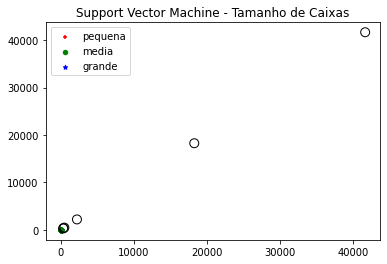

In [60]:

x_train, y_train = make_blobs(n_samples=70, random_state=0,cluster_std=0.60)
for i in range(0, x_train.shape[0]):
  if y_train[i] == 0:
    p = plt.scatter(x_train[i,0],x_train[i,1],c='r',    s=20,marker='+')
  elif y_train[i] == 1:
    m = plt.scatter(x_train[i,0],x_train[i,1],c='g',    s=20,marker='o')
  elif y_train[i] == 2:
    g = plt.scatter(x_train[i,0],x_train[i,1],c='b',    s=20,marker='*')
plt.scatter(model.support_vectors_[:,], model.support_vectors_[:,], s=80,linewidth=1, facecolors='none', edgecolors='k')
# get the separating hyperplane

plt.legend([p, m, g], ['pequena', 'media',   'grande'])
plt.title('Support Vector Machine - Tamanho de Caixas')
plt.show()